<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

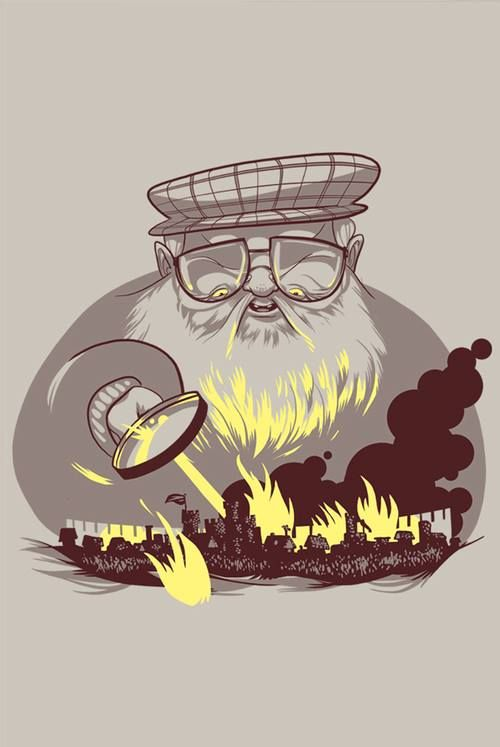

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
!gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

Downloading...
From: https://drive.google.com/uc?id=1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S
To: /content/game_of_thrones_test.csv
100% 38.3k/38.3k [00:00<00:00, 69.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV
To: /content/game_of_thrones_train.csv
100% 141k/141k [00:00<00:00, 67.6MB/s]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv("/content/game_of_thrones_train.csv", index_col='S.No')
data

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,298.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,299.0,NaN,NaN,NaN,House Seaworth,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


In [ ]:
data_test = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')
data_test.head()

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,NaN,House Blackwood,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,NaN,R'hllor,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Trant,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,300.0,NaN,NaN,NaN,House Frey,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   DateoFdeath       307 non-null    float64
 6   mother            18 non-null     object 
 7   father            22 non-null     object 
 8   heir              21 non-null     object 
 9   house             1176 non-null   object 
 10  spouse            200 non-null    object 
 11  book1             1557 non-null   int64  
 12  book2             1557 non-null   int64  
 13  book3             1557 non-null   int64  
 14  book4             1557 non-null   int64  
 15  book5             1557 non-null   int64  
 16  isAliveMother     18 non-null     float64
 17  

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
#Заполняю NaN значения дома, используя фамилии героев
def extract_last_name(name):
    return name.split()[-1]
data['house'] = data['house'].fillna('House'+data['name'].apply(extract_last_name))
data_test['house'] = data_test['house'].fillna('House'+data_test['name'].apply(extract_last_name))
data.head()

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,HouseTargaryen,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


In [ ]:
#Заполняю NaN значения title на 1 или 0 в зависимости от того, есть титул или нет

data['title'] = data['title'].fillna(0)
data['title']=(data['title'] != 0).astype(int)
data_test['title'] = data_test['title'].fillna(0)
data_test['title']=(data_test['title'] != 0).astype(int)


In [ ]:
#Если у персонажа есть дата смерти, поставим 1, иначе - 0. Наличие даты смерти, по сути, гарантирует нам, что персонаж мертв
data['DateoFdeath'].fillna(0)
data["DateoFdeath"]=(data['DateoFdeath'] > 0).astype(int)
data_test['DateoFdeath'].fillna(0)
data_test["DateoFdeath"]=(data_test['DateoFdeath'] > 0).astype(int)


In [ ]:
data.isna().sum()

,0
name,0
title,0
male,0
culture,1069
dateOfBirth,1278
DateoFdeath,0
mother,1539
father,1535
heir,1536
house,0


In [ ]:
data_test.drop(columns=["age","name","dateOfBirth","mother","father","heir","spouse","isAliveMother","isAliveFather","isAliveHeir","isAliveSpouse"],inplace=True)
data.drop(columns=["age","name","dateOfBirth","mother","father","heir","spouse","isAliveMother","isAliveFather","isAliveHeir","isAliveSpouse"],inplace=True)

In [ ]:
data.head()

,title,male,culture,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,
1,0,1,NaN,0,HouseTargaryen,0,0,0,0,0,0,0,11,0.605351,0
2,1,1,Rivermen,0,House Frey,1,1,1,1,1,1,1,1,0.896321,1
3,1,1,NaN,0,House Swyft,0,0,0,1,0,0,1,0,0.267559,1
4,1,0,NaN,1,House Arryn,0,0,0,0,0,1,1,0,0.183946,0
5,1,0,Dornish,0,House Santagar,0,0,0,1,0,1,1,0,0.043478,1


In [ ]:
data_test.head()

,title,male,culture,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,
1558,0,0,NaN,0,House Blackwood,0,0,0,0,1,0,0,0,0.050167
1559,0,0,Asshai,0,R'hllor,0,1,1,1,1,0,0,0,0.745819
1560,0,0,NaN,0,Brotherhood without banners,0,0,1,1,0,0,0,0,0.010033
1561,1,1,NaN,0,House Trant,1,1,1,1,1,0,1,0,0.220736
1562,0,1,Riverlands,1,House Frey,1,1,1,1,1,1,0,0,0.434783


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
#Создаем признаки isPopular и boolDeadRelations
data["isPopular"]=(data['popularity'] >= 0.5).astype(int)
data_test["isPopular"]=(data_test['popularity'] >= 0.5).astype(int)
data["boolDeadRelations"]=(data['numDeadRelations'] > 0).astype(int)
data_test["boolDeadRelations"]=(data_test['numDeadRelations'] >0).astype(int)
data.head()


,title,male,culture,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,0,1,NaN,0,HouseTargaryen,0,0,0,0,0,0,0,11,0.605351,0,1,1
2,1,1,Rivermen,0,House Frey,1,1,1,1,1,1,1,1,0.896321,1,1,1
3,1,1,NaN,0,House Swyft,0,0,0,1,0,0,1,0,0.267559,1,0,0
4,1,0,NaN,1,House Arryn,0,0,0,0,0,1,1,0,0.183946,0,0,0
5,1,0,Dornish,0,House Santagar,0,0,0,1,0,1,1,0,0.043478,1,0,0


In [ ]:
# Упрощаем признак culture
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
for key,value in cult.items():

  data['culture'] = data['culture'].replace(value, key)
  data_test['culture'] = data_test['culture'].replace(value, key)

In [ ]:
df = pd.DataFrame(data.house.value_counts())
df

,count
house,
House Frey,89
Night's Watch,88
House Stark,56
House Targaryen,40
House Lannister,36
...,...
HouseDraqaz,1
HouseDonyse,1
HouseDobber,1


In [ ]:
df_test = pd.DataFrame(data_test.house.value_counts())
df_test

,count
house,
House Targaryen,22
House Martell,18
Night's Watch,17
House Stark,16
House Lannister,13
...,...
House Farring,1
House Dayne of High Hermitage,1
HouseQotho,1


In [ ]:
#Разделим дома по категориям. В 1 отнесем дома, в которых живет от 20 человек, во вторую - от 10 до 19, в третью - до 10
for i in data['house'].unique():
  if (df['count'].loc[i])>=20:
    data['house'] = data['house'].replace(i, 'House1')
  elif (df['count'].loc[i])>=10 and (df['count'].loc[i])<20:
    data['house'] = data['house'].replace(i, 'House2')
  else:
    data['house'] = data['house'].replace(i, 'House3')

for i in data_test['house'].unique():
  if (df_test['count'].loc[i])>=20:
    data_test['house'] = data_test['house'].replace(i, 'House1')
  elif (df_test['count'].loc[i])>=10 and (df_test['count'].loc[i])<20:
    data_test['house'] = data_test['house'].replace(i, 'House2')
  else:
    data_test['house'] = data_test['house'].replace(i, 'House3')

In [ ]:
data.head()

,title,male,culture,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,
1,0,1,NaN,0,House2,0,0,0,0,0,0,0,11,0.605351,0,1,1
2,1,1,Rivermen,0,House1,1,1,1,1,1,1,1,1,0.896321,1,1,1
3,1,1,NaN,0,House3,0,0,0,1,0,0,1,0,0.267559,1,0,0
4,1,0,NaN,1,House2,0,0,0,0,0,1,1,0,0.183946,0,0,0
5,1,0,Dornish,0,House3,0,0,0,1,0,1,1,0,0.043478,1,0,0


In [ ]:
data_test.head()

,title,male,culture,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1558,0,0,NaN,0,House3,0,0,0,0,1,0,0,0,0.050167,0,0
1559,0,0,Asshai,0,House3,0,1,1,1,1,0,0,0,0.745819,1,0
1560,0,0,NaN,0,House3,0,0,1,1,0,0,0,0,0.010033,0,0
1561,1,1,NaN,0,House3,1,1,1,1,1,0,1,0,0.220736,0,0
1562,0,1,Riverlands,1,House3,1,1,1,1,1,1,0,0,0.434783,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
#Удалим колонки с коэффициентом популярности и числом связей
data.drop(columns=["popularity","numDeadRelations"], inplace = True)
data_test.drop(columns=["popularity","numDeadRelations"], inplace = True)
data.head()

,title,male,culture,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1,0,1,NaN,0,House2,0,0,0,0,0,0,0,0,1,1
2,1,1,Rivermen,0,House1,1,1,1,1,1,1,1,1,1,1
3,1,1,NaN,0,House3,0,0,0,1,0,0,1,1,0,0
4,1,0,NaN,1,House2,0,0,0,0,0,1,1,0,0,0
5,1,0,Dornish,0,House3,0,0,0,1,0,1,1,1,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [ ]:
#Проверим, правда ли все люди, у которых есть дата смерти, мертвы
data[data['DateoFdeath'] == 1]['isAlive'].value_counts()

,count
isAlive,
0,306


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              1557 non-null   int64 
 1   male               1557 non-null   int64 
 2   culture            488 non-null    object
 3   DateoFdeath        1557 non-null   int64 
 4   house              1557 non-null   object
 5   book1              1557 non-null   int64 
 6   book2              1557 non-null   int64 
 7   book3              1557 non-null   int64 
 8   book4              1557 non-null   int64 
 9   book5              1557 non-null   int64 
 10  isMarried          1557 non-null   int64 
 11  isNoble            1557 non-null   int64 
 12  isAlive            1557 non-null   int64 
 13  isPopular          1557 non-null   int64 
 14  boolDeadRelations  1557 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 194.6+ KB


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
#OneHotEncoding для столбца house
categorical_columns = ['house']
categorical_features = data[categorical_columns]
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(categorical_features)

one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=data.index
                          )
one_hot_data

,house_House1,house_House2,house_House3
S.No,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
5,0.0,0.0,1.0
...,...,...,...
1553,0.0,0.0,1.0
1554,0.0,0.0,1.0
1555,0.0,0.0,1.0


In [ ]:
#OneHotEncoding для столбца house
categorical_columns = ['house']
categorical_features = data_test[categorical_columns]
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(categorical_features)

one_hot_data_test = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns), index=data_test.index
                          )
one_hot_data_test

,house_House1,house_House2,house_House3
S.No,,,
1558,0.0,0.0,1.0
1559,0.0,0.0,1.0
1560,0.0,0.0,1.0
1561,0.0,0.0,1.0
1562,0.0,0.0,1.0
...,...,...,...
1942,0.0,1.0,0.0
1943,0.0,0.0,1.0
1944,0.0,0.0,1.0


In [ ]:
#Объединяем обработанные данные с остальными
data = pd.concat([data, one_hot_data], axis=1)
data_test = pd.concat([data_test, one_hot_data_test], axis=1)

data = data.drop(categorical_columns, axis=1)
data_test = data_test.drop(categorical_columns, axis=1)
data_test.head()

,title,male,culture,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,isPopular,boolDeadRelations,house_House1,house_House2,house_House3
S.No,,,,,,,,,,,,,,,,
1558,0,0,NaN,0,0,0,0,0,1,0,0,0,0,0.0,0.0,1.0
1559,0,0,Asshai,0,0,1,1,1,1,0,0,1,0,0.0,0.0,1.0
1560,0,0,NaN,0,0,0,1,1,0,0,0,0,0,0.0,0.0,1.0
1561,1,1,NaN,0,1,1,1,1,1,0,1,0,0,0.0,0.0,1.0
1562,0,1,Riverlands,1,1,1,1,1,1,1,0,0,0,0.0,0.0,1.0


In [ ]:
data.head()

,title,male,culture,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations,house_House1,house_House2,house_House3
S.No,,,,,,,,,,,,,,,,,
1,0,1,NaN,0,0,0,0,0,0,0,0,0,1,1,0.0,1.0,0.0
2,1,1,Rivermen,0,1,1,1,1,1,1,1,1,1,1,1.0,0.0,0.0
3,1,1,NaN,0,0,0,0,1,0,0,1,1,0,0,0.0,0.0,1.0
4,1,0,NaN,1,0,0,0,0,0,1,1,0,0,0,0.0,1.0,0.0
5,1,0,Dornish,0,0,0,0,1,0,1,1,1,0,0,0.0,0.0,1.0


In [ ]:
#LabelEncoding для столбца культуры
categorical_columns = ['culture']
categorical_features = data[categorical_columns]
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in categorical_columns:
  data[column] = label_encoding.fit_transform(data[column])

data.head()

,title,male,culture,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,isAlive,isPopular,boolDeadRelations,house_House1,house_House2,house_House3
S.No,,,,,,,,,,,,,,,,,
1,0,1,48,0,0,0,0,0,0,0,0,0,1,1,0.0,1.0,0.0
2,1,1,31,0,1,1,1,1,1,1,1,1,1,1,1.0,0.0,0.0
3,1,1,48,0,0,0,0,1,0,0,1,1,0,0,0.0,0.0,1.0
4,1,0,48,1,0,0,0,0,0,1,1,0,0,0,0.0,1.0,0.0
5,1,0,7,0,0,0,0,1,0,1,1,1,0,0,0.0,0.0,1.0


In [ ]:
#LabelEncoding для столбца культуры
categorical_columns = ['culture']
categorical_features = data_test[categorical_columns]


label_encoding = LabelEncoder()

for column in categorical_columns:
  data_test[column] = label_encoding.fit_transform(data_test[column])

data_test.head()

,title,male,culture,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,isPopular,boolDeadRelations,house_House1,house_House2,house_House3
S.No,,,,,,,,,,,,,,,,
1558,0,0,48,0,0,0,0,0,1,0,0,0,0,0.0,0.0,1.0
1559,0,0,0,0,0,1,1,1,1,0,0,1,0,0.0,0.0,1.0
1560,0,0,48,0,0,0,1,1,0,0,0,0,0,0.0,0.0,1.0
1561,1,1,48,0,1,1,1,1,1,0,1,0,0,0.0,0.0,1.0
1562,0,1,32,1,1,1,1,1,1,1,0,0,0,0.0,0.0,1.0


<Axes: >

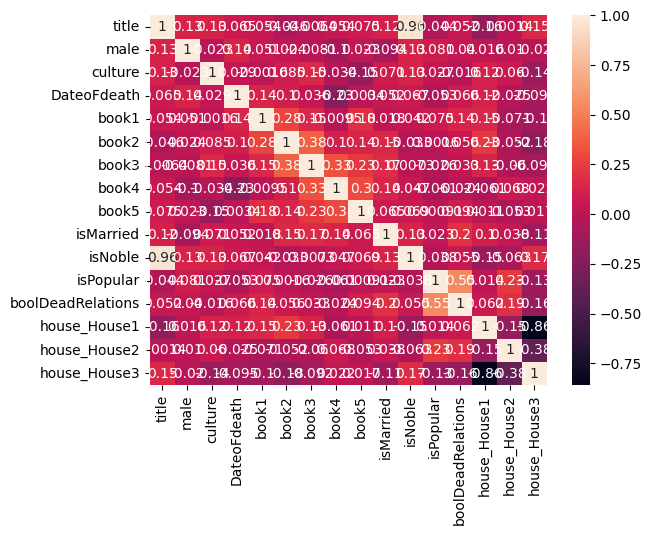

In [ ]:
sns.heatmap(data.drop(columns=["isAlive"]).corr(), annot=True)

In [ ]:
#Посмотрим, сколько титулованых персонажей
data[data['title'] == 1]['title'].value_counts()

,count
title,
1,717


In [ ]:
#Посмотрим, сколько знатных персонажей
data[data['isNoble'] == 1]['isNoble'].value_counts()

,count
isNoble,
1,684


In [ ]:
#Так как столбик с титуловаными персонажами почти полностью повторяет столбик со знатными, удалим столбик с титуловаными персонажами, тк в нем больше данных (мы могли отнести к титулу не слишком значимый статус)
data_test.drop(columns=["title"],inplace=True)
data.drop(columns=["title"],inplace=True)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
#Посмотрим, сколько в тренировочном датасете выжило персонажей
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


In [ ]:
#Посмотрим, сколько выжило мужчин
data[data['male'] == 1]['isAlive'].value_counts()

,count
isAlive,
1,669
0,251


In [ ]:
#Посмотрим влияние популярности на выживаемость
data[data['isPopular'] == 1]['isAlive'].value_counts()

,count
isAlive,
0,16
1,11


In [ ]:
#Посмотрим влияние многочисленности дома на выживаемость
data[data['house_House1'] == 1]['isAlive'].value_counts()

,count
isAlive,
1,274
0,118


In [ ]:
#Посмотрим влияние многочисленности дома на выживаемость
data[data['house_House2'] == 1]['isAlive'].value_counts()

,count
isAlive,
1,66
0,29


In [ ]:
#Посмотрим влияние многочисленности дома на выживаемость
data[data['house_House3'] == 1]['isAlive'].value_counts()

,count
isAlive,
1,872
0,198


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data.drop(columns=['isAlive'])
y = data['isAlive']


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, shuffle=True, test_size=0.2, random_state=44)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
!pip uninstall -y scikit-learn # удалим более старую версию библиотеки
!pip install scikit-learn # установим версию поновее


Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)


Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели LogisticRegression
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

#Шаг 4. Предсказание на тестовых данных для сдачи задания
X_test_submission = data_test.values
y_pred_submission = logistic_regression.predict(X_test_submission)

# Шаг 5. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9776


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)

# Шаг 2. обучение модели
rf_classifier.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred = rf_classifier.predict(X_test)

#Шаг 4. Предсказание на тестовых данных для сдачи задания
X_test_submission_best = data_test.values
y_pred_submission_best = rf_classifier.predict(X_test_submission)

#Шаг 5. Оценка предсказания по метрике accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9808


In [ ]:
# Шаг 1. создание модели AdaBoostClassifier
ABC_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Шаг 2. обучение модели
ABC_classifier.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred = ABC_classifier.predict(X_test)

#Шаг 4. Предсказание на тестовых данных для сдачи задания
X_test_submission = data_test.values
y_pred_submission = ABC_classifier.predict(X_test_submission)

#Шаг 5. Оценка предсказания по метрике accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy : 0.9776


In [ ]:
# Шаг 1. создание модели GaussianProcessClassifier
Gaussian_classifier = GaussianProcessClassifier(random_state=42)

# Шаг 2. обучение модели
Gaussian_classifier.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred = Gaussian_classifier.predict(X_test)

#Шаг 4. Предсказание на тестовых данных для сдачи задания
X_test_submission = data_test.values
y_pred_submission = Gaussian_classifier.predict(X_test_submission)

#Шаг 5. Оценка предсказания по метрике accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9487


In [ ]:
# Шаг 1. создание модели GaussianNB
GaussianNB_classifier = GaussianNB()

# Шаг 2. обучение модели
GaussianNB_classifier.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred = GaussianNB_classifier.predict(X_test)

#Шаг 4. Предсказание на тестовых данных для сдачи задания
X_test_submission = data_test.values
y_pred_submission = GaussianNB_classifier.predict(X_test_submission)

#Шаг 5. Оценка предсказания по метрике accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9712


In [ ]:
# Шаг 1. создание модели KNeighborsClassifier
KNN_classifier = KNeighborsClassifier(n_neighbors=20)

# Шаг 2. обучение модели
KNN_classifier.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred = KNN_classifier.predict(X_test)

#Шаг 4. Предсказание на тестовых данных для сдачи задания
X_test_submission = data_test.values
y_pred_submission = KNN_classifier.predict(X_test_submission)

#Шаг 5. Оценка предсказания по метрике accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8942


In [ ]:
# Шаг 1. создание модели SVC
SVC_classifier = SVC(kernel='linear', C=1)

# Шаг 2. обучение модели
SVC_classifier.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred = SVC_classifier.predict(X_test)

#Шаг 4. Предсказание на тестовых данных для сдачи задания
X_test_submission = data_test.values
y_pred_submission = SVC_classifier.predict(X_test_submission)

#Шаг 5. Оценка предсказания по метрике accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9776


In [ ]:
# Шаг 1. создание модели DecisionTreeClassifier
DecisionTree_classifier = DecisionTreeClassifier(max_depth=10)

# Шаг 2. обучение модели
DecisionTree_classifier.fit(X_train, y_train)


# Шаг 3. Предсказание на тестовых данных
y_pred = DecisionTree_classifier.predict(X_test)

#Шаг 4. Предсказание на тестовых данных для сдачи задания
X_test_submission = data_test.values
y_pred_submission = DecisionTree_classifier.predict(X_test_submission)

#Шаг 5. Оценка предсказания по метрике accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9808


## Часть 3. Оцените качество моделей

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 7.12MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission['isAlive'] = y_pred_submission_best

In [ ]:
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,0
...,...
1942,0
1943,0
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission_best.csv", index=False)